# Google Colab only

In [18]:
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget --directory-prefix=/content -q http://apache.osuosl.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
# !wget --directory-prefix=/content -q http://apache.osuosl.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
# !tar xf spark-2.4.5-bin-hadoop2.7.tgz
# !pip install -q findspark

In [19]:
# import os
# import findspark

# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

# findspark.init("/content/spark-2.4.5-bin-hadoop2.7")

In [2]:
from IPython.display import Image

# Big Data Problem

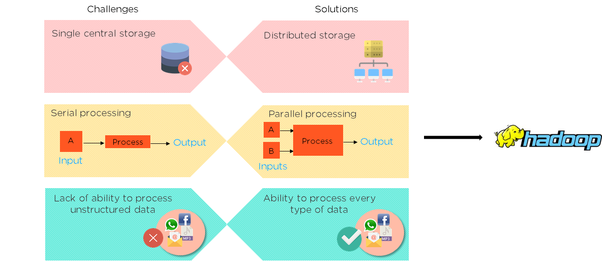

In [15]:
Image("./assets/hadoop.png", width=1000, height=1000)

# What is Hadoop?

Hadoop is a framework that allows you to first store Big Data in a distributed environment, so that, you can process it parallely. There are basically two components in Hadoop:

The first one is HDFS for storage (Hadoop distributed File System), that allows you to store data of various formats across a cluster. The second one is YARN, for resource management in Hadoop. It allows parallel processing over the data, i.e. stored across HDFS.

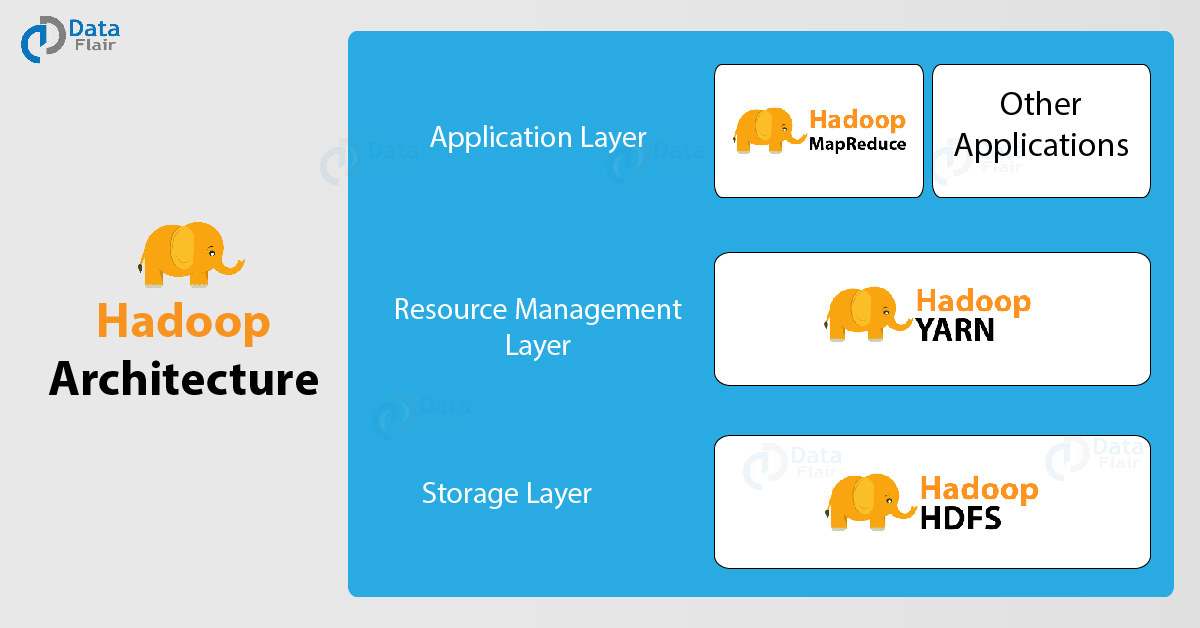

In [14]:
Image("./assets/Hadoop-Architecture.jpg", width=1000, height=1000)

# MapReduce

MapReduce is a programming model for processing large data sets with a parallel , distributed algorithm on a cluster

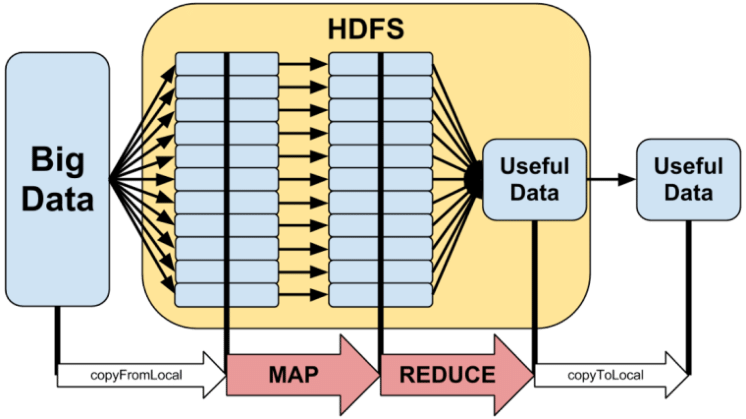

In [13]:
Image("./assets/mapreduce.png", width=1000, height=1000)

# Yarn

Apache Hadoop YARN is the resource management and job scheduling technology in the open source Hadoop distributed processing framework

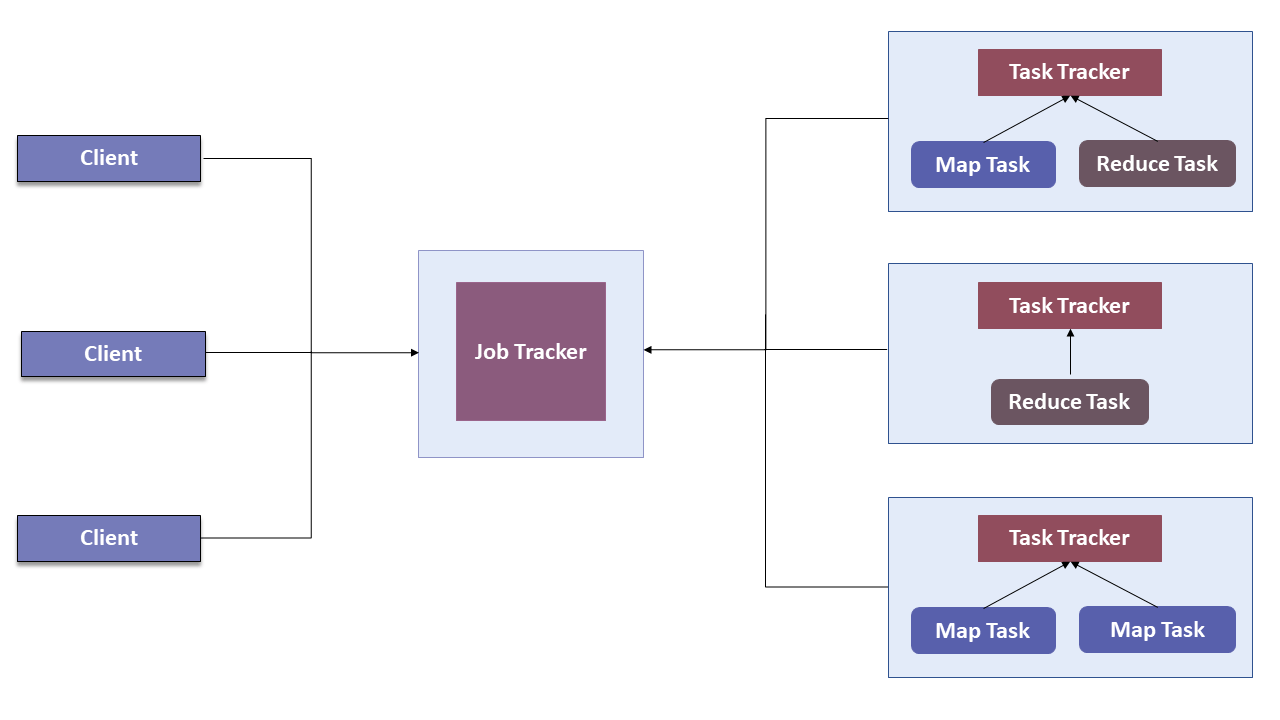

In [17]:
Image("./assets/yarn.png", width=1000, height=1000)

# Spark

- Spark executes much faster by caching data in memory across multiple parallel operations, whereas MapReduce involves more reading and writing from disk.
- Spark runs multi-threaded tasks inside of JVM processes, whereas MapReduce runs as heavier weight JVM processes. This gives Spark faster startup, better parallelism, and better CPU utilization.
- Spark provides a richer functional programming model than MapReduce.
- Spark is especially useful for parallel processing of distributed data with iterative algorithms.

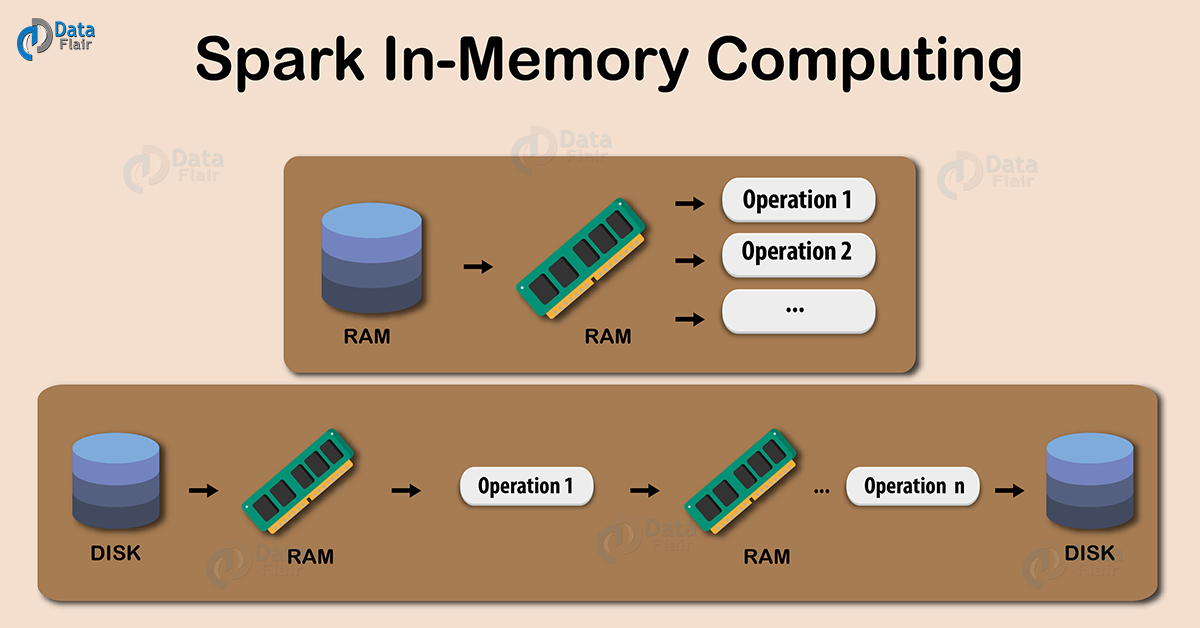

In [12]:
Image("./assets/spark_memory_computing.jpg", width=1000, height=1000)

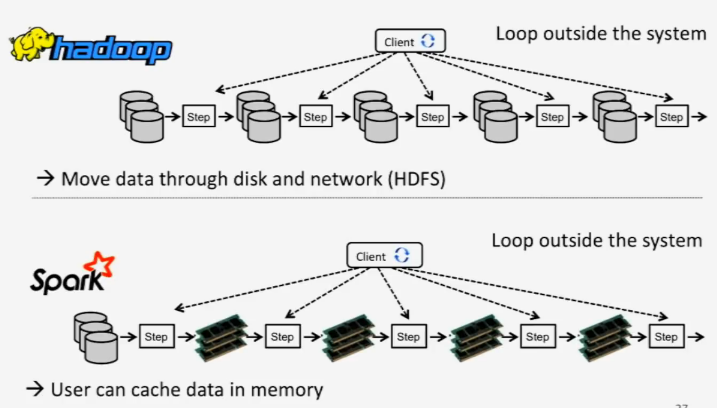

In [16]:
Image("./assets/hadoop_vs_spark.png", width=1000, height=1000)

In [21]:
from pyspark import SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql import functions as F
from pyspark.sql.types import (
    StringType,
    ArrayType,
    IntegerType,
    FloatType,
    StructType,
    StructField,
    BooleanType,
    MapType,
    DateType
)
import re

In [22]:
spark = SparkSession \
            .builder \
            .appName("EML Batch 9") \
            .getOrCreate()

sc = spark.sparkContext

# Resilient Distributed Dataset (RDD)

In short, an RDD represents an immutable, partitioned collection of records that can be operated on in parallel

In [5]:
rdd1 = sc.parallelize([("a", 1), ("b", 2), ("c", 3)])
rdd1

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195

In [6]:
rdd2 = rdd1.map(lambda x: x[1] * 2)

In [7]:
rdd2.reduce(lambda x, y: x + y)

12

# DataFrame

In [26]:
df = spark.read.csv("./data/clean_apps.csv", header=True)
df.show(1, truncate=False, vertical=True)

-RECORD 0---------------------------------
 App            | App Seguridad AV Villas 
 Category       | Finance                 
 Rating         | 2.3                     
 Reviews        | 251                     
 Size           | 5.7M                    
 Installs       | 50,000+                 
 Type           | Free                    
 Price          | 0                       
 Content Rating | Everyone                
 Last Updated   | October 12, 2017        
 Current Ver    | 1.0.5                   
 Android Ver    | 4.0 and up              
only showing top 1 row



# Transformation

In [27]:
df = df \
    .withColumn("App", F.lower(F.col("App")))

df.show(1, truncate=False, vertical=True)

-RECORD 0---------------------------------
 App            | app seguridad av villas 
 Category       | Finance                 
 Rating         | 2.3                     
 Reviews        | 251                     
 Size           | 5.7M                    
 Installs       | 50,000+                 
 Type           | Free                    
 Price          | 0                       
 Content Rating | Everyone                
 Last Updated   | October 12, 2017        
 Current Ver    | 1.0.5                   
 Android Ver    | 4.0 and up              
only showing top 1 row



In [28]:
@F.udf(returnType=IntegerType())
def numeric_only(x):
    return int("".join(re.findall(r"\d", x)))

df = df \
    .withColumn("Installs", numeric_only("Installs"))

df.show(1, truncate=False, vertical=True)

-RECORD 0---------------------------------
 App            | app seguridad av villas 
 Category       | Finance                 
 Rating         | 2.3                     
 Reviews        | 251                     
 Size           | 5.7M                    
 Installs       | 50000                   
 Type           | Free                    
 Price          | 0                       
 Content Rating | Everyone                
 Last Updated   | October 12, 2017        
 Current Ver    | 1.0.5                   
 Android Ver    | 4.0 and up              
only showing top 1 row



# Action

In [30]:
df.take(5)

[Row(App='app seguridad av villas', Category='Finance', Rating='2.3', Reviews='251', Size='5.7M', Installs=50000, Type='Free', Price='0', Content Rating='Everyone', Last Updated='October 12, 2017', Current Ver='1.0.5', Android Ver='4.0 and up'),
 Row(App='fvd ad-free', Category='Tools', Rating='4.171033977022733', Reviews='1774', Size='4.1M', Installs=10000, Type='Paid', Price='$1.99', Content Rating='Everyone', Last Updated='October 5, 2017', Current Ver='4.4.3', Android Ver='3.0 and up'),
 Row(App='fe cps', Category='Finance', Rating='3.0', Reviews='62', Size='17M', Installs=10000, Type='Free', Price='0', Content Rating='Everyone', Last Updated='June 26, 2017', Current Ver='0.1.8', Android Ver='4.0 and up'),
 Row(App='wifi action camera', Category='Sports', Rating='2.4', Reviews='551', Size='903k', Installs=100000, Type='Free', Price='0', Content Rating='Everyone', Last Updated='March 13, 2014', Current Ver='1.4', Android Ver='4.0 and up'),
 Row(App='microsoft word', Category='Produc

In [31]:
df.collect()

[Row(App='app seguridad av villas', Category='Finance', Rating='2.3', Reviews='251', Size='5.7M', Installs=50000, Type='Free', Price='0', Content Rating='Everyone', Last Updated='October 12, 2017', Current Ver='1.0.5', Android Ver='4.0 and up'),
 Row(App='fvd ad-free', Category='Tools', Rating='4.171033977022733', Reviews='1774', Size='4.1M', Installs=10000, Type='Paid', Price='$1.99', Content Rating='Everyone', Last Updated='October 5, 2017', Current Ver='4.4.3', Android Ver='3.0 and up'),
 Row(App='fe cps', Category='Finance', Rating='3.0', Reviews='62', Size='17M', Installs=10000, Type='Free', Price='0', Content Rating='Everyone', Last Updated='June 26, 2017', Current Ver='0.1.8', Android Ver='4.0 and up'),
 Row(App='wifi action camera', Category='Sports', Rating='2.4', Reviews='551', Size='903k', Installs=100000, Type='Free', Price='0', Content Rating='Everyone', Last Updated='March 13, 2014', Current Ver='1.4', Android Ver='4.0 and up'),
 Row(App='microsoft word', Category='Produc

In [32]:
df.show(1, truncate=False, vertical=True)

-RECORD 0---------------------------------
 App            | app seguridad av villas 
 Category       | Finance                 
 Rating         | 2.3                     
 Reviews        | 251                     
 Size           | 5.7M                    
 Installs       | 50000                   
 Type           | Free                    
 Price          | 0                       
 Content Rating | Everyone                
 Last Updated   | October 12, 2017        
 Current Ver    | 1.0.5                   
 Android Ver    | 4.0 and up              
only showing top 1 row



In [23]:
spark.stop()